<a href="https://colab.research.google.com/github/tarunnp776060-pixel/React-app/blob/main/LAB_Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd



In [17]:
data = fetch_california_housing()
housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df["MedHouseVal"] = data.target
print(housing_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [18]:
numerical_features = housing_df.select_dtypes(include=[np.number]).columns
print(numerical_features)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


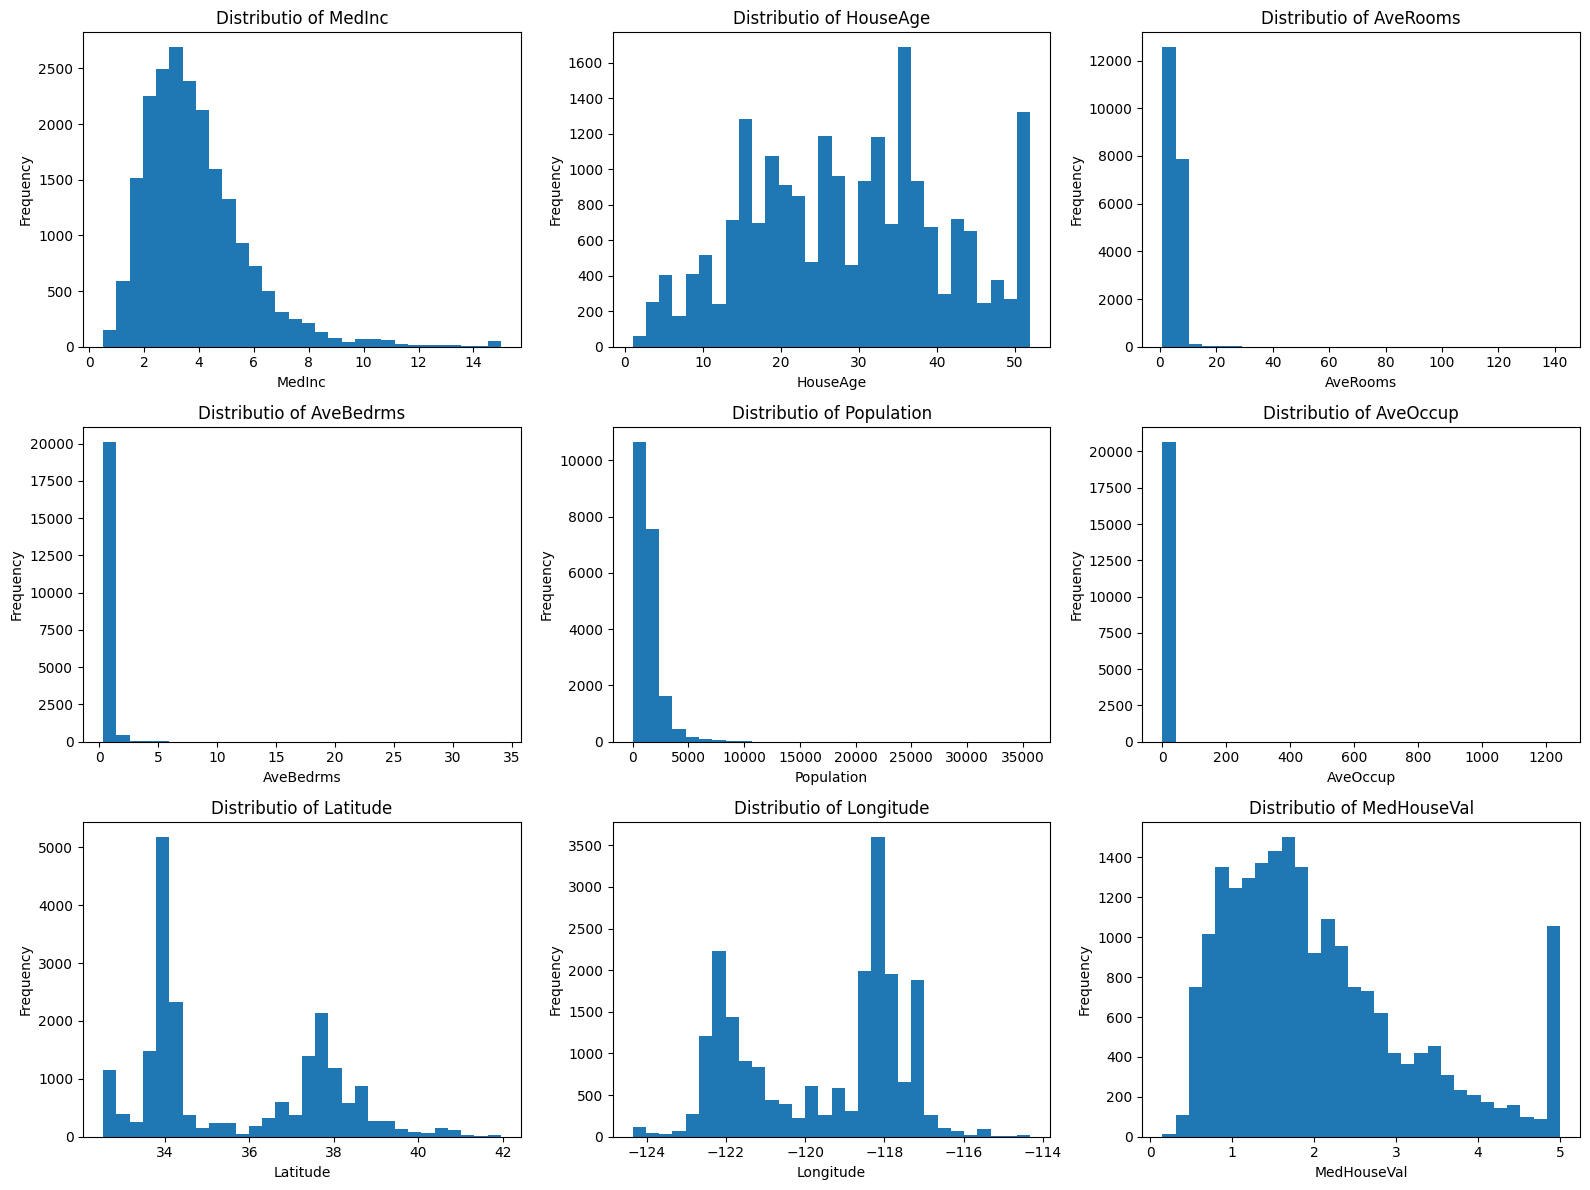

In [19]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features):
  plt.subplot(3, 3, i + 1)
  plt.hist(housing_df[feature], bins=30)
  plt.title(f"Distributio of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

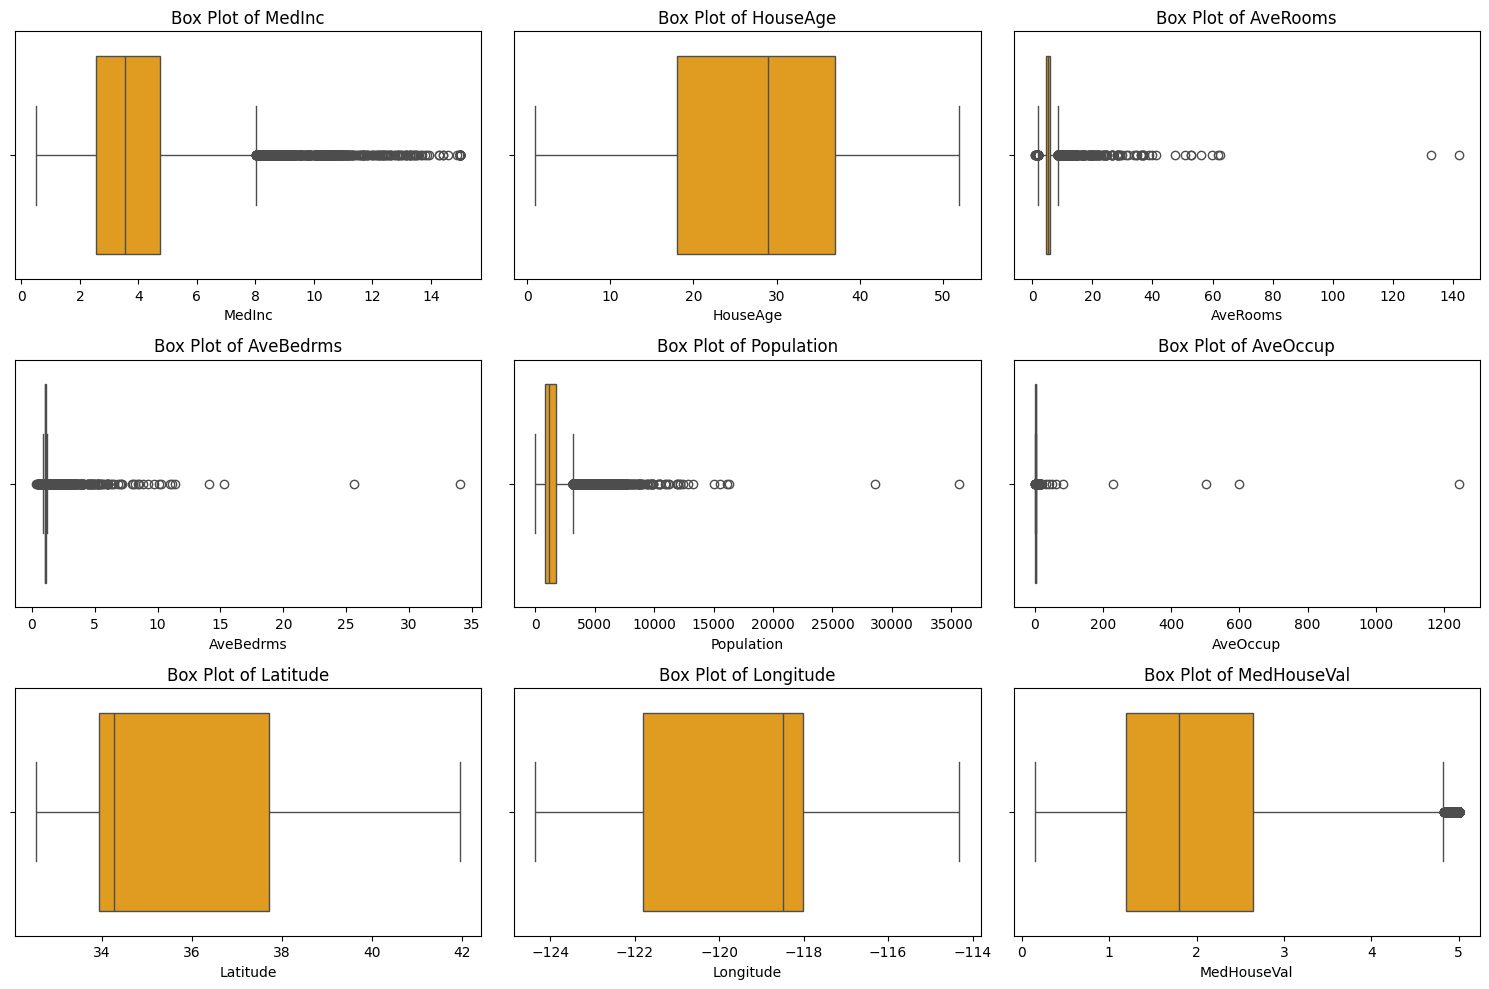

In [20]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(x=housing_df[feature], color='orange')
  plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [24]:
print("Outliers Detection:")
outliers_summary = {}
for feature in numerical_features:
  Q1 = housing_df[feature].quantile(0.55)
  Q3 = housing_df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
  outliers_summary[feature] = len(outliers)
  print(f"{feature}: {len(outliers)} outliers")

Outliers Detection:
MedInc: 5205 outliers
HouseAge: 8705 outliers
AveRooms: 6520 outliers
AveBedrms: 6252 outliers
Population: 4754 outliers
AveOccup: 6041 outliers
Latitude: 37 outliers
Longitude: 12596 outliers
MedHouseVal: 4203 outliers


we use IQR method to find the outliers Summary